In [1]:
from models import BrazilCFR
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [2]:
self = BrazilCFR()

In [ ]:
from DataPipes.model_datapipeline import DataPipes

In [ ]:
data = DataPipes()

In [ ]:
data.get_fpi[data.get_fpi.index.year==self.year]

In [ ]:
self.get_eurusd[self.get_eurusd.index==self.year]

In [3]:
import os

In [4]:
month = self.month
year = self.year

In [5]:
# print(f"Predicting Brazil >> {self.month} / {self.year}...")
# get DATA
fao = self.get_food_price_index
eurusd = self.get_eurusd
fertprod = self.get_total_fertilizer_production
inflation = self.get_g20_cpi
gdp = self.get_gdp
brazil_cfr = self.get_BrazilCFR

dm = self.monthly_dummy(month)
const = self.const

# LATEST ENTRY ONLY
# FAO
f = fao[(fao.index.month==self.month) & (fao.index.year==self.year)].iloc[-1]
# EURUSD
e = eurusd[(eurusd.index.month==self.month) & (eurusd.index.year==self.year)].iloc[-1]
# FERTILIZER PRODUCTION
fert = fertprod[(fertprod.index.month==self.month) & (fertprod.index.year==self.year)].iloc[-1]
# INFLATION
ig20 = inflation[(inflation.index.month==self.month) & (inflation.index.year==self.year)].iloc[-1]
# GDP
g = gdp[(gdp.index.month==self.month) & (gdp.index.year==self.year)].iloc[-1]
# BRAZIL CFR
b = brazil_cfr[(brazil_cfr.index.month==self.month) & (brazil_cfr.index.year==self.year)].iloc[-1]

brazil_latest_cfr = []
for _ in tqdm(range(self.simulations)):
    fao2m = self.tri_distribute(f.lag1,f.std1)
    fao3m = self.tri_distribute(f.lag2,f.std2)
    fao6m = self.tri_distribute(f.lag3,f.std3)
    e0m = self.tri_distribute(e['DEXUSEU'],e.std_1)
    fert0m = self.tri_distribute(fert.FertProdQuad,fert.std_quad)
    ig200m = self.tri_distribute(ig20.G20CPI,ig20.std_1)
    g0m = self.tri_distribute(g.GDPQXUS,g.std_1)
    b0m = self.tri_distribute(b.BrazilCFR,b.std_1)
    brazil_latest_cfr.append(dm + const + self.FAOPriceIndex_2*fao2m + self.FAOPriceIndex_3*fao3m + self.FAOPriceIndex_6*fao6m + self.USDEURO*e0m + self.FertProdQuad*fert0m + self.G20Inflation*ig200m + self.USGDP*g0m + self.BrazilCFR_1*b0m)



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [00:01<00:00, 13510.49it/s]


In [11]:
pred_df = pd.DataFrame(brazil_latest_cfr,columns=['Predictions'])

In [20]:
p25,p75 = pred_df.quantile(q=[0.25,0.75]).Predictions.tolist()

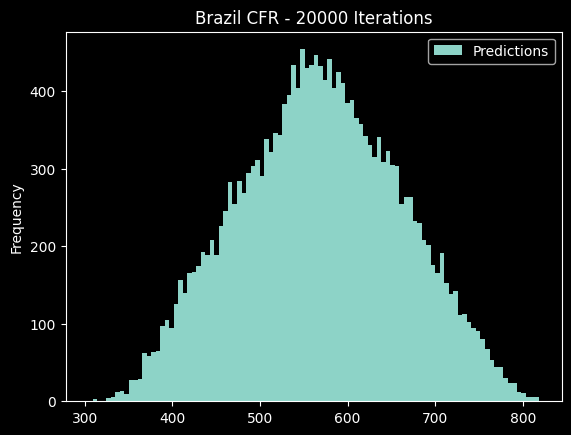

In [14]:
pred_df.plot(kind='hist',bins=100,title=f'Brazil CFR - {self.simulations} Iterations');

In [15]:
prediction = round(self.kde_max_density(pred_df)['Predictions'],2)

In [16]:
prediction

560.78

In [29]:
self.report.loc[len(self.report)+1] = [self.year, self.month, "Brazil", p25,prediction,p75]

In [31]:
self.report

,Year,Month,Model,P25,EV,P75
1,2023,1,Brazil,502.201172,560.78,635.146623


In [23]:
self.report = pd.DataFrame(columns=["Year",'Month','Model','P25','EV','P75'])

In [24]:
pd.concat([self.report])

AttributeError: 'DataFrame' object has no attribute 'concat'

In [ ]:
data.get_usdeur.to_csv('aws_usdeur.csv')

In [ ]:
self.get_eurusd.index==self.year

In [ ]:
fao = self.get_food_price_index

In [ ]:
self.month

In [ ]:
self.year

In [ ]:
fao[fao.index.year==self.year]

In [ ]:
fao[(fao.index.month==self.month) & (fao.index.year==self.year)]

In [ ]:
fao[(fao.index.month==self.month) & (fao.index.year==self.year)].iloc[-1]

In [ ]:
# @property
# def base_prediction(self):
#     """
#     Predicts next months CFR pricing for brazil
#     """
#     # Food Price Index with lags
#     fao_2 = self.FAOPriceIndex_2 * self.get_food_price_index['Food Price Index'].iloc[-1-2]
#     fao_3 = self.FAOPriceIndex_3 * self.get_food_price_index['Food Price Index'].iloc[-1-3]
#     fao_6 = self.FAOPriceIndex_6 * self.get_food_price_index['Food Price Index'].iloc[-1-6]
#     # Exchange rates
#     eurusd = self.USDEURO * (self.get_eurusd['Adj Close']).iloc[-1]
#     # Fertilizer production quadratic
#     fertprodquad = self.FertProdQuad * (self.get_total_fertilizer_production['Total Fertilizer Production']**2).iloc[-1]
#     # G20Inflation
#     g20inflation = self.G20Inflation * self.get_g20_cpi['G20CPI'].dropna().iloc[-1]
#     # DUMMY
#     monthly_dummy = self.monthly_dummy()
#     # GDP
#     g = self.get_gdp
#     gdp = self.USGDP * g[(g.index.month==self.month) & (g.index.year==self.year)]['GDPQXUS'].iloc[-1]
#     # Brazil CFR _Fertilizer Weeek
#     brazil_cfr_1 = self.BrazilCFR_1 * self.get_BrazilCFR['BrazilCFR'].iloc[-1]
#     # Poly. Eq.
#     brazil_cfr = fao_2+fao_3+fao_6+eurusd+fertprodquad+g20inflation+monthly_dummy+gdp+brazil_cfr_1+self.const
#     print(f"Brazil: ${round(brazil_cfr_1,2)} ->> ${round(brazil_cfr,2)} | {round((brazil_cfr/brazil_cfr_1-1)*100,1)}% {'up' if brazil_cfr >= brazil_cfr_1 else 'down' }")
#     return brazil_cfr

In [ ]:
simulations = 20000

In [ ]:
self = BrazilCFR()

In [ ]:
# get DATA
fao = self.get_food_price_index
eurusd = self.get_eurusd
fertprod = self.get_total_fertilizer_production
inflation = self.get_g20_cpi
gdp = self.get_gdp
brazil_cfr = self.get_BrazilCFR

dm = self.monthly_dummy()
const = self.const

In [ ]:
gdp.tail()

In [ ]:
# len(fao.dropna())
# len(eurusd.dropna())
# len(fertprod.dropna())
# len(inflation.dropna())
# len(gdp.dropna())
# len(brazil_cfr.dropna())

# LATEST ENTRY ONLY

In [ ]:
# FAO
f = fao[(fao.index.month==self.month) & (fao.index.year==self.year)].iloc[-1]
# EURUSD
e = eurusd[(eurusd.index.month==self.month) & (eurusd.index.year==self.year)].iloc[-1]
# FERTILIZER PRODUCTION
fert = fertprod[(fertprod.index.month==self.month) & (fertprod.index.year==self.year)].iloc[-1]
# INFLATION
ig20 = inflation[(inflation.index.month==self.month) & (inflation.index.year==self.year)].iloc[-1]
# GDP
g = gdp[(gdp.index.month==self.month) & (gdp.index.year==self.year)].iloc[-1]
# BRAZIL CFR
b = brazil_cfr[(brazil_cfr.index.month==self.month) & (brazil_cfr.index.year==self.year)].iloc[-1]

In [ ]:
brazil_latest_cfr = []
for i in tqdm(range(simulations)):
    fao2m = np.random.triangular(f.fao_2m-f.std_2m_8,f.fao_2m,f.fao_2m+f.std_2m_8)
    fao3m = np.random.triangular(f.fao_3m-f.std_3m_6,f.fao_3m,f.fao_3m+f.std_3m_6)
    fao6m = np.random.triangular(f.fao_6m-f.std_6m_3,f.fao_6m,f.fao_6m+f.std_6m_3)
    e0m = np.random.triangular(e['Adj Close']-e.std_3,e['Adj Close'],e['Adj Close']+e.std_3)
    fert0m = np.random.triangular(fert.FertProdQuad-fert.std_quad_60,fert.FertProdQuad,fert.FertProdQuad+fert.std_quad_60)
    ig200m = np.random.triangular(ig20.G20CPI-ig20.std_6,ig20.G20CPI,ig20.G20CPI+ig20.std_6)
    g0m = np.random.triangular(g.GDPQXUS-g.std_48,g.GDPQXUS,g.GDPQXUS+g.std_48)
    b0m = np.random.triangular(b.BrazilCFR-b.std_12,b.BrazilCFR,b.BrazilCFR+b.std_12)

    brazil_latest_cfr.append(dm + const + self.FAOPriceIndex_2*fao2m + self.FAOPriceIndex_3*fao3m + self.FAOPriceIndex_6*fao6m + self.USDEURO*e0m + self.FertProdQuad*fert0m + self.G20Inflation*ig200m + self.USGDP*g0m + self.BrazilCFR_1*b0m)

In [ ]:
pred_df = pd.DataFrame(brazil_latest_cfr,columns=['Predictions'])

In [ ]:
pred_df.describe()

In [ ]:
pred_df.plot(kind='hist',bins=100,title=f'Brazil CFR - {simulations} Iterations');

In [ ]:
self.kde_max_density(pred_df)

In [ ]:
from models import BrazilCFR

In [ ]:
self = BrazilCFR()

In [ ]:
month = 10
year = 2021

In [ ]:
if month:
    self.month=month
if year:
    self.year = year

print(f"Predicting Brazil >> {self.month} / {self.year}...")

In [ ]:
# get DATA
fao = self.get_food_price_index
eurusd = self.get_eurusd
fertprod = self.get_total_fertilizer_production
inflation = self.get_g20_cpi
gdp = self.get_gdp
brazil_cfr = self.get_BrazilCFR

dm = self.monthly_dummy(month)
const = self.const

In [ ]:
# LATEST ENTRY ONLY
# FAO
f = fao[(fao.index.month==self.month) & (fao.index.year==self.year)].iloc[-1]
# EURUSD
e = eurusd[(eurusd.index.month==self.month) & (eurusd.index.year==self.year)].iloc[-1]
# FERTILIZER PRODUCTION
fert = fertprod[(fertprod.index.month==self.month) & (fertprod.index.year==self.year)].iloc[-1]
# INFLATION
ig20 = inflation[(inflation.index.month==self.month) & (inflation.index.year==self.year)].iloc[-1]
# GDP
g = gdp[(gdp.index.month==self.month) & (gdp.index.year==self.year)].iloc[-1]
# BRAZIL CFR
b = brazil_cfr[(brazil_cfr.index.month==self.month) & (brazil_cfr.index.year==self.year)].iloc[-1]

In [ ]:
gdp.dropna()